Recitation 2

By: Christopher Morris     
Due: May 1, 2019

Purpose: A Program that models the magnetic field of a loop of wire with constant current.
What: The program initializes a 3D meshgrid of an inputed range of points. Two points on the wire are created using get_dl using theta and theta + dt. dl is then obtained by by subtracting the second point by the first. This utilizes the definition of dl. Every point in the three meshgrids are subtracted by the initial point on the wire found for dl, and then the respective points are combined into vectors which represent the radius vector from the point on the wire out to the observation point. Each of the radius vectors are crossed by with the dl vector, and the components of the resultant vector are divided by the magnitude of the radius vector cubed and added to the respective components of the magnetic field. This process is done for each observation point represented by the meshgrid for each point on the circle from 0 <= theta < 2pi.

Graphing: Three plots have been made. The first is a full 3D plot. The next is a 2D projection of when z = 0, the next is a 2D projection when z = 2, and the final is a 2D projection when x = 0. The graphs rely on indexing the various meshgrids and B arrays using indices based on point limits and number of points. This means that changing the bounds or number of points will make the 2D projections not be valid for what they are supposed to represent.

For Part A) The plt.quiver does not work with the all components of the Bx and By set to zero, so plt.plot had to be used. This means that the plot is not based on the vector field, but it is what it should look like. The values of Bx and By for z = 0 (in this case indexed by [:,:,3]) have all components equal to zero which verifys that the programs works, it's just plt.quiver that is the problem.


**The vectors for the graphs have been normalized so that they can be seen on the graphs**

In [32]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
import matplotlib.cm as cm

# Function that return the position vector of a point on the wire given a r nothing theta.
def get_dl(theta, r):
    return np.array([r * np.cos(theta), r * np.sin(theta), 0])

# Main Function that generates the meshgrid and magnetic field arrays and returns them.
def magnetic_field_new(r, n, x_span, y_span, z_span):
    # Initializing the points that will be used to generate the meshgrid
    xpoints = np.linspace(-x_span, x_span, n)
    ypoints = np.linspace(-y_span, y_span, n)
    zpoints = np.linspace(-z_span, z_span, n)
    
    xx, yy, zz = np.meshgrid(xpoints, ypoints, zpoints, indexing = 'ij') #generating the meshgrid
    
    # Lists to store the values of the circle points generated by get_dl
    x_circle = []
    y_circle = []
    z_circle = []
    
    #Empty lists to add onto the components of the calculated magnetic field.
    Bx = np.zeros((n,n,n))
    By = np.zeros((n,n,n))
    Bz = np.zeros((n,n,n))

    #Initial theta and dtheta
    theta = 0 
    dtheta = np.pi/50
    
    # Main while loop
    while theta < 2*np.pi:
        
        rpos = get_dl(theta, r) # Initial position on wire
        dl = get_dl(theta + dtheta, r) - rpos # dl vector made from subtracting Next position dtheta away from inital 
        
        # Adds components of circle position vector to lists
        x_circle.append(rpos[0]) 
        y_circle.append(rpos[1])
        z_circle.append(rpos[2])
        
        for x in range(n):
            for y in range(n):
                for z in range(n):
                    robs = np.array([xx[x,y,z], yy[x,y,z], zz[x,y,z]]) - rpos #Vector from wire to observation location               
                    dl_cross_robs = np.cross(dl, robs) #Cross dl x r
                    magnitude = np.sqrt(robs[0]**2 + robs[1]**2 + robs[2]**2) #magnitude of r
                    
                    # Adds components of dl x r / r**3 to each B array
                    Bx[x,y,z] += dl_cross_robs[0] / np.power(magnitude, 3) 
                    By[x,y,z] += dl_cross_robs[1] / np.power(magnitude, 3)
                    Bz[x,y,z] += dl_cross_robs[2] / np.power(magnitude, 3)
                    
        theta += dtheta #Updates Theta
    
    # This is included to make each vector normalized so you can see them on the graph.
    for x in range(n):
        for y in range(n):
            for z in range(n):
                magnitude = np.sqrt(Bx[x,y,z]**2 + By[x,y,z]**2 + Bz[x,y,z]**2)
                Bx[x,y,z] /= magnitude
                By[x,y,z] /= magnitude
                Bz[x,y,z] /= magnitude
        
    return xx, yy, zz, Bx, By, Bz, x_circle, y_circle, z_circle

Extra Credit: 3D graph


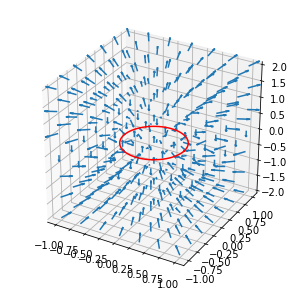

In [33]:
xx, yy, zz, Bx, By, Bz, x_circle, y_circle, z_circle = magnetic_field_new(.5, 7, 1, 1, 2)
fig = plt.figure(figsize = (5,5))
ax = fig.gca(projection='3d')
plt.quiver(xx,yy,zz,Bx,By,Bz,length= .2)
plt.plot(x_circle, y_circle, z_circle, 'r')
print ('Extra Credit: 3D graph')
plt.show()

A) Plot for z = 0
** The Plt quiver function does not work for vectors with both zero components
However, both Bx[:,:,3] and By[:,:,3] are printed below and the components are zeros which is what is expected.

Bx at z = 0:

[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]

By at z = 0:

[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]


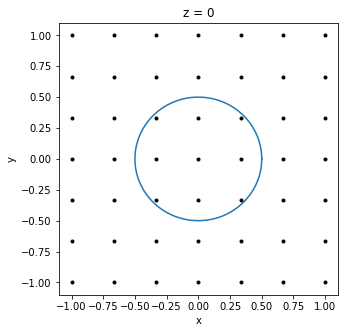

In [38]:
fig = plt.figure(figsize = (5,5))

#plt.quiver(xx[:,:,3],yy[:,:,3],Bx[:,:,3],By[:,:,3], norm = True)
plt.plot(xx[:,:,3], yy[:,:,3], 'ko', markersize = 3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('z = 0')
print('A) Plot for z = 0')
print('** The Plt quiver function does not work for vectors with both zero components')
print('However, both Bx[:,:,3] and By[:,:,3] are printed below and the components are zeros which is what is expected.')
print('\nBx at z = 0:\n')
print(Bx[:,:,3])
print('\nBy at z = 0:\n')
print(By[:,:,3])
plt.plot(x_circle, y_circle)

B) Plot for z=2


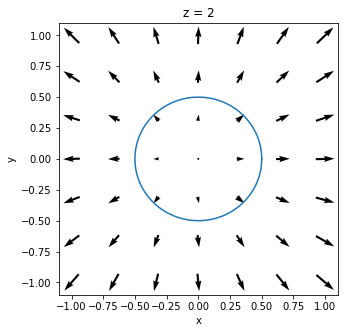

In [39]:
fig = plt.figure(figsize = (5,5))
i = -1
plt.quiver(xx[:,:,i], yy[:,:,i], Bx[:,:,i], By[:,:,i], pivot = 'mid', norm = True)
plt.plot(x_circle, y_circle)
plt.xlabel('x')
plt.ylabel('y')
plt.title('z = 2')
print('B) Plot for z=2')

C) Plot for x = 0


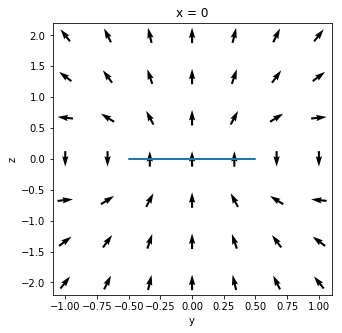

In [36]:
fig = plt.figure(figsize = (5,5))
plt.quiver(yy[3,:,:], zz[3,:,:], By[3,:,:], Bz[3,:,:], pivot = 'mid', norm = True)
plt.plot(y_circle, z_circle)
plt.xlabel('y')
plt.ylabel('z')
plt.title('x = 0')
print('C) Plot for x = 0')